In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
import numpy as np

In [13]:
Train = pd.read_csv(r"C:\Users\kerrs\Desktop\elo-merchant-category-recommendation\train.csv", parse_dates=['first_active_month'])
Train.shape

(201917, 6)

In [14]:
Train.dtypes

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object

In [15]:
Merchant = pd.read_csv(r"C:\Users\kerrs\Desktop\elo-merchant-category-recommendation\merchants.csv")

In [16]:
Merchant.shape

(334696, 22)

In [17]:
Merchant.head()

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2 category_1 most_recent_sales_range  \
0    -0.057471    -0.057471          N                       E   
1    -0.057471    -0.057471          N                       E   
2    -0.057471    -0.057471          N                       E   
3    -0.057471    -0.057471          Y                       E   
4    -0.057471    -0.057471          Y                       E   

  most_recent_purchases_range  avg_sales_lag3  ...  avg_sales_lag6  \
0                           E           -0.40  ...           -2.25   
1                           E           -0.72  ...           -0.74   
2                           E          -82.13  ...          -82.13   
3                           E             NaN  ...             NaN   
4                           E             NaN  ...             NaN   

   avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
0           18.666667                   6            -2.32   
1            1.291667                   6            -0.57   
2          260.000000                   2           -82.13   
3            4.666667                   6              NaN   
4            0.361111                   6              NaN   

   avg_purchases_lag12  active_months_lag12  category_4  city_id state_id  \
0            13.916667                   12           N      242        9   
1             1.687500                   12           N       22       16   
2           260.000000                    2           N       -1        5   
3             3.833333                   12           Y       -1       -1   
4             0.347222                   12           Y       -1       -1   

   category_2  
0         1.0  
1         1.0  
2         5.0  
3         NaN  
4         NaN  

[5 rows x 22 columns]

In [18]:
New_Actions = pd.read_csv(r"C:\Users\kerrs\Desktop\elo-merchant-category-recommendation\new_merchant_transactions.csv", parse_dates=['purchase_date'])

In [19]:
New_Actions.shape

(1963031, 14)

In [20]:
New_Actions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  
0        -0.557574 2018-03-11 14:57:36         1.0         9            19  
1        -0.569580 2018-03-19 18:53:37         1.0         9            19  
2        -0.551037 2018-04-26 14:08:44         1.0         9            14  
3        -0.671925 2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904 2018-03-22 21:07:53         NaN        -1            29

In [21]:
History = pd.read_csv(r"C:\Users\kerrs\Desktop\elo-merchant-category-recommendation\historical_transactions.csv", nrows = 3000000, parse_dates=['purchase_date'])

In [22]:
History.tail(10)

authorized_flag          card_id  city_id category_1  installments  \
2999990               Y  C_ID_43384d07f4       -1          Y             1   
2999991               Y  C_ID_43384d07f4      137          N             1   
2999992               Y  C_ID_43384d07f4      137          N             1   
2999993               Y  C_ID_43384d07f4       69          N             1   
2999994               Y  C_ID_43384d07f4      137          N             1   
2999995               Y  C_ID_43384d07f4      137          N             1   
2999996               Y  C_ID_2c47a53889       -1          N             1   
2999997               Y  C_ID_2c47a53889       51          N             1   
2999998               Y  C_ID_2c47a53889       69          N             1   
2999999               Y  C_ID_2c47a53889       51          N             1   

        category_3  merchant_category_id      merchant_id  month_lag  \
2999990          B                   879  M_ID_00a6ca8a8a         -1   
2999991          B                   278  M_ID_3f897c07d9         -2   
2999992          B                   278  M_ID_3f897c07d9         -3   
2999993          B                   879  M_ID_00a6ca8a8a         -2   
2999994          B                   278  M_ID_3f897c07d9         -2   
2999995          B                   842  M_ID_aa441c15ff         -5   
2999996          B                   690  M_ID_f95833eb95         -2   
2999997          B                   705  M_ID_7379a348db         -2   
2999998          B                   879  M_ID_00a6ca8a8a          0   
2999999          B                   842  M_ID_8db2a7039a         -2   

         purchase_amount       purchase_date  category_2  state_id  \
2999990        -0.716855 2017-06-12 18:19:57         NaN        -1   
2999991        -0.728876 2017-05-08 22:52:38         3.0        19   
2999992        -0.701828 2017-04-28 19:36:04         3.0        19   
2999993        -0.725871 2017-05-11 22:14:10         1.0         9   
2999994        -0.676283 2017-05-07 21:48:07         3.0        19   
2999995        -0.734887 2017-02-28 11:13:27         3.0        19   
2999996         0.148672 2017-10-20 22:04:22         NaN        -1   
2999997        -0.683796 2017-10-19 14:46:56         1.0        16   
2999998        -0.597154 2017-12-19 13:55:35         1.0         9   
2999999        -0.707388 2017-10-10 23:23:02         1.0        16   

         subsector_id  
2999990            29  
2999991            37  
2999992            37  
2999993            29  
2999994            37  
2999995            37  
2999996             1  
2999997            33  
2999998            29  
2999999            37

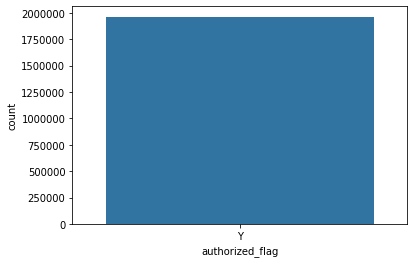

In [23]:
ax = sns.countplot(x = 'authorized_flag', data = New_Actions)

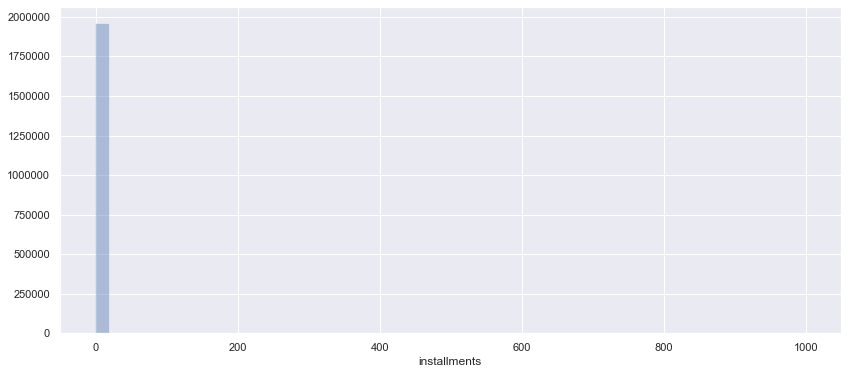

In [70]:
ax = sns.distplot(New_Actions['installments'], kde = False)

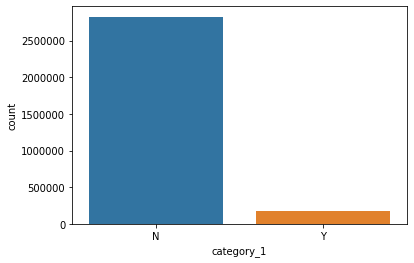

In [25]:
ax = sns.countplot(x = 'category_1', data = History)

In [26]:
New_Actions['purchase_amount_integer'] = New_Actions.purchase_amount.apply(lambda x: x == np.round(x))
print(New_Actions.groupby('purchase_amount_integer')['card_id'].count())

purchase_amount_integer
False    1963031
Name: card_id, dtype: int64


In [27]:
New_Actions['purchase_amount_new'] = np.round(New_Actions['purchase_amount'] / 0.00150265118 + 497.06,2)

In [28]:
New_Actions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  \
0        -0.557574 2018-03-11 14:57:36         1.0         9            19   
1        -0.569580 2018-03-19 18:53:37         1.0         9            19   
2        -0.551037 2018-04-26 14:08:44         1.0         9            14   
3        -0.671925 2018-03-07 09:43:21         NaN        -1             8   
4        -0.659904 2018-03-22 21:07:53         NaN        -1            29   

   purchase_amount_integer  purchase_amount_new  
0                    False               126.00  
1                    False               118.01  
2                    False               130.35  
3                    False                49.90  
4                    False                57.90

In [29]:
New_Actions['USA'] = New_Actions['purchase_amount_new'] * .25
New_Actions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  \
0        -0.557574 2018-03-11 14:57:36         1.0         9            19   
1        -0.569580 2018-03-19 18:53:37         1.0         9            19   
2        -0.551037 2018-04-26 14:08:44         1.0         9            14   
3        -0.671925 2018-03-07 09:43:21         NaN        -1             8   
4        -0.659904 2018-03-22 21:07:53         NaN        -1            29   

   purchase_amount_integer  purchase_amount_new      USA  
0                    False               126.00  31.5000  
1                    False               118.01  29.5025  
2                    False               130.35  32.5875  
3                    False                49.90  12.4750  
4                    False                57.90  14.4750

In [30]:
History.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  
0        -0.703331 2017-06-25 15:33:07         1.0        16            37  
1        -0.733128 2017-07-15 12:10:45         1.0        16            16  
2        -0.720386 2017-08-09 22:04:29         1.0        16            37  
3        -0.735352 2017-09-02 10:06:26         1.0        16            34  
4        -0.722865 2017-03-10 01:14:19         1.0        16            37

In [31]:
History['purchase_amount_integer'] = History.purchase_amount.apply(lambda x: x == np.round(x))
print(History.groupby('purchase_amount_integer')['card_id'].count())

purchase_amount_integer
False    2999998
True           2
Name: card_id, dtype: int64


In [32]:
History['purchase_amount_new'] = np.round(History['purchase_amount'] / 0.00150265118 + 497.06,2)

In [33]:
History['USA'] = History['purchase_amount_new'] * .25
History.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount       purchase_date  category_2  state_id  subsector_id  \
0        -0.703331 2017-06-25 15:33:07         1.0        16            37   
1        -0.733128 2017-07-15 12:10:45         1.0        16            16   
2        -0.720386 2017-08-09 22:04:29         1.0        16            37   
3        -0.735352 2017-09-02 10:06:26         1.0        16            34   
4        -0.722865 2017-03-10 01:14:19         1.0        16            37   

   purchase_amount_integer  purchase_amount_new     USA  
0                    False                29.00  7.2500  
1                    False                 9.17  2.2925  
2                    False                17.65  4.4125  
3                    False                 7.69  1.9225  
4                    False                16.00  4.0000

In [34]:
History.dtypes

authorized_flag                    object
card_id                            object
city_id                             int64
category_1                         object
installments                        int64
category_3                         object
merchant_category_id                int64
merchant_id                        object
month_lag                           int64
purchase_amount                   float64
purchase_date              datetime64[ns]
category_2                        float64
state_id                            int64
subsector_id                        int64
purchase_amount_integer              bool
purchase_amount_new               float64
USA                               float64
dtype: object

In [ ]:
sns.distplot(New_Actions["purchase_amount_you"])

In [35]:
Merchant.active_months_lag12.value_counts()

12    305101
11      4449
10      4143
9       3824
8       3756
7       3274
6       2737
5       2276
4       2050
3       1652
2        896
1        538
Name: active_months_lag12, dtype: int64

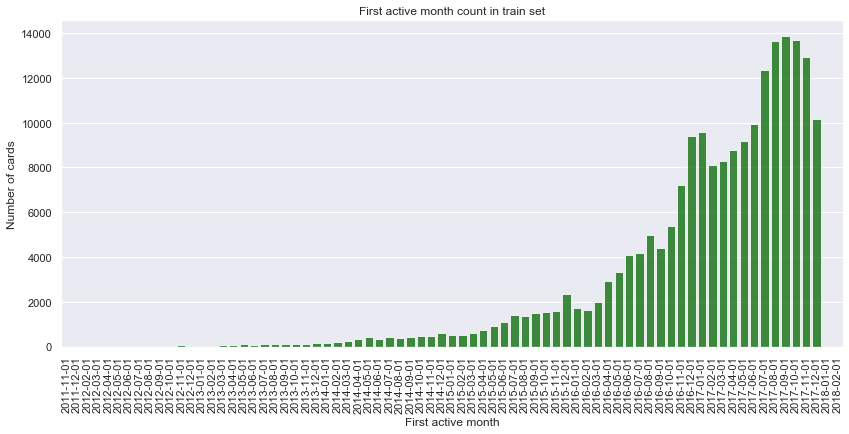

In [51]:
cnt_srs = Train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

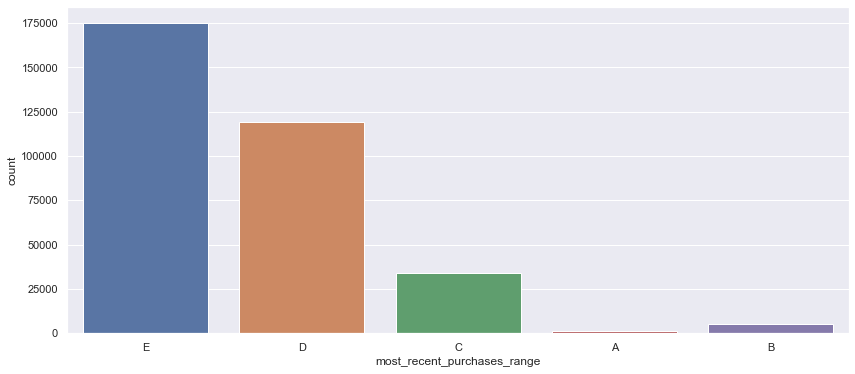

In [53]:
sns.countplot(x = 'most_recent_purchases_range',  data = Merchant)

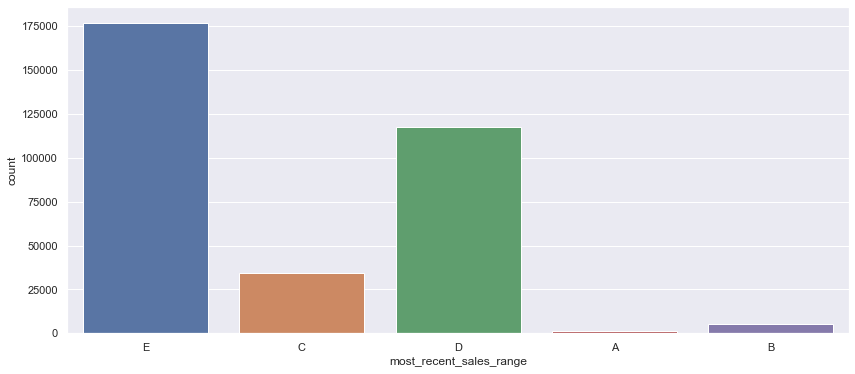

In [54]:
sns.countplot(x = 'most_recent_sales_range',  data = Merchant)

In [55]:
inner_join = pd.merge(Train, New_Actions, on = 'card_id', how = 'inner')


In [56]:
inner_join.shape

(1219685, 22)

In [57]:
sns.countplot(x = 'most_recent_sales_range',  data = inner_join)

ValueError: Could not interpret input 'most_recent_sales_range'

In [59]:
Super_Join = pd.merge(inner_join, Merchant, on = 'merchant_id', how = 'inner')
Super_Join.shape

(1223315, 43)

In [61]:
Super_Join.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-10-01  C_ID_f0975077c6          2          3          0   
2         2017-11-01  C_ID_cda6f8466a          2          2          0   
3         2017-07-01  C_ID_b69187377b          2          1          0   
4         2016-12-01  C_ID_f1747588a5          2          1          0   

     target authorized_flag  city_id_x category_1_x  installments  ...  \
0 -0.820283               Y         19            N             0  ...   
1  1.272357               Y        138            N             1  ...   
2 -0.340947               Y        199            N             0  ...   
3 -1.603394               Y         19            N             1  ...   
4  0.105042               Y        213            N             1  ...   

  avg_sales_lag6  avg_purchases_lag6 active_months_lag6  avg_sales_lag12  \
0           1.25            1.226935                  6             1.29   
1           1.25            1.226935                  6             1.29   
2           1.25            1.226935                  6             1.29   
3           1.25            1.226935                  6             1.29   
4           1.25            1.226935                  6             1.29   

   avg_purchases_lag12 active_months_lag12  category_4  city_id_y  state_id_y  \
0             1.261291                  12           N         -1           9   
1             1.261291                  12           N         -1           9   
2             1.261291                  12           N         -1           9   
3             1.261291                  12           N         -1           9   
4             1.261291                  12           N         -1           9   

   category_2_y  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  

[5 rows x 43 columns]

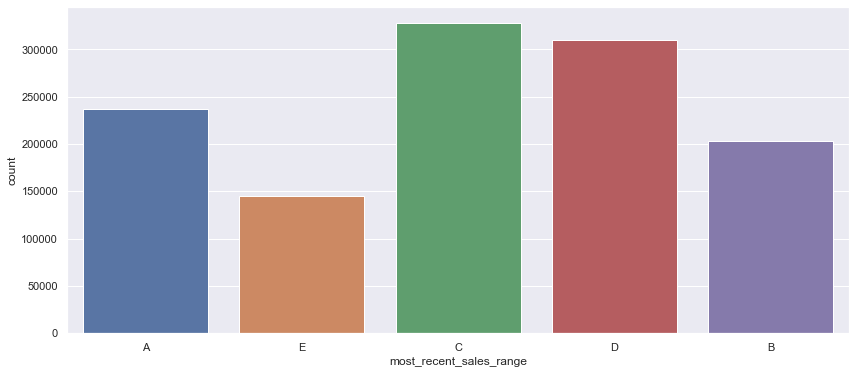

In [62]:
sns.countplot(x = 'most_recent_sales_range',  data = Super_Join)

C:\Users\kerrs\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


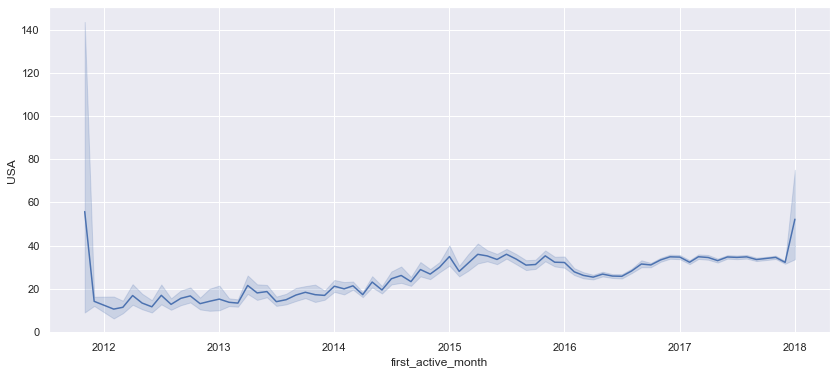

In [68]:
sns.lineplot(x= "first_active_month", y = 'USA', data=Super_Join)